# Plotting the data on a map

This guide provides step-by-step instructions on how to plot data onto a map using different methods in Python. We'll cover methods using '*matplotlib*', '*cartopy*', '*seaborn*', '*plotly*', and '*geopandas*'

## Prerequisites

Ensure you have the required libraries installed. You can install them using pip:

```bash
pip install xarray matplotlib cartopy seaborn plotly geopandas
```

## Loading the dataset (Already covered??)

First, load the dataset using '*xarray*'.

In [1]:
import xarray as xr

#Load the dataset
ds = xr.open_dataset('https://thredds.met.no/thredds/dodsC/remotesensingenvisat/asar-doppler/2012/04/08/ASA_WSDV2PRNMI20120408_110444_000618683113_00267_52867_0000.nc')

## Using '*matplotlib*' and '*cartopy*'

Extract data variables. Here, we use the variable '*fdg*'.

In [3]:
fdg = ds['fdg']
lat = ds['latitude']
lon = ds['longitude']

Plot the data

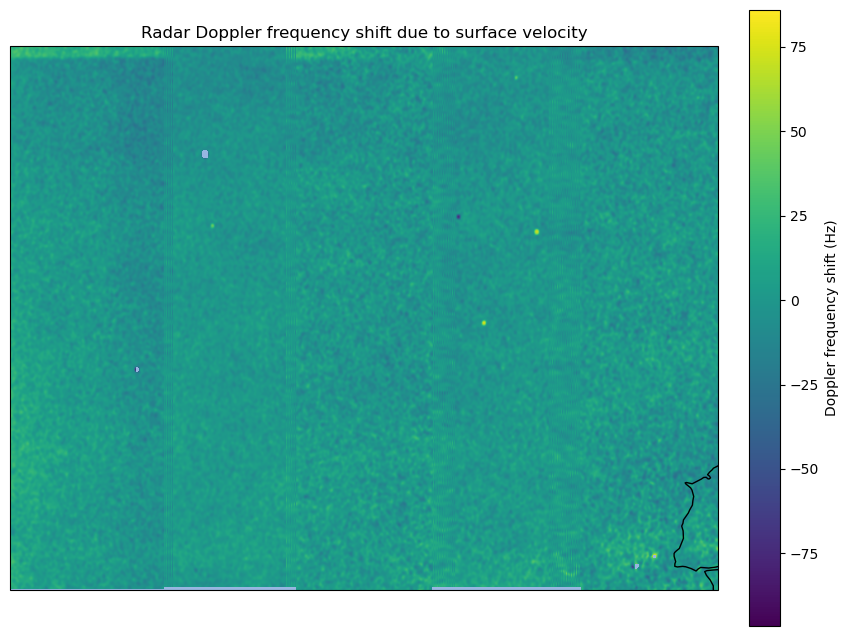

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

#Create a plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

#Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

#Plot the data using seaborn
im = ax.imshow(fdg, extent=[lon.min(), lon.max(), lat.min(), lat.max()], 
               origin='upper', transform=ccrs.PlateCarree(), cmap='viridis')


#Add a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Doppler frequency shift (Hz)')

#Add a title
plt.title('Radar Doppler frequency shift due to surface velocity')

#Show the plot
plt.show()


## Using '*plotly*' for interactive plots (Unstable!)

Convert the Dataset to a DataFrame

In [10]:
df = ds.to_dataframe().reset_index()

Create an interactive plot

In [ ]:
import plotly.express as px

#Create an interactive plot
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='fdg',
                     projection='natural earth', title='Radar Doppler frequency shift due to surface velocity')

#Show the plot
fig.show()

## Using '*geopandas*' for geographic data handling

Convert the Dataset to a GeoDataFrame

In [12]:
import geopandas as gpd 
from shapely.geometry import Point

#Convert the datasert to a DataFrame 
df = ds.to_dataframe().reset_index()

#Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

Plot using '*gepandas*'

/tmp/ipykernel_42020/1434787509.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



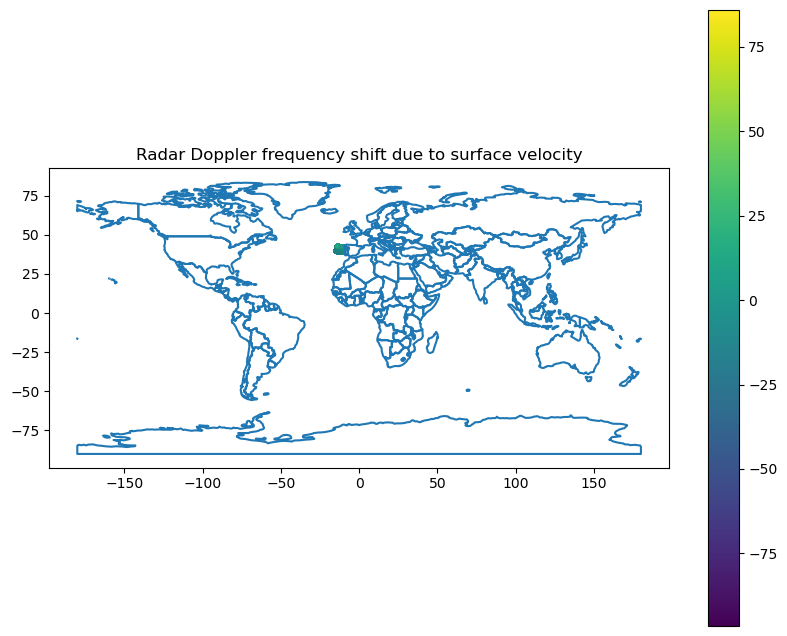

In [15]:
import matplotlib.pyplot as plt 

#Plot using geopandas
fig, ax = plt.subplots(figsize=(10,8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
gdf.plot(column='fdg', ax=ax, legend=True, cmap='viridis', markersize=5)

#Add a title
plt.title('Radar Doppler frequency shift due to surface velocity')

#Show the plot
plt.show()